<a href="https://colab.research.google.com/github/Urvi-G/blank-app/blob/main/Inspirit_AI_Project_E_Commerce_Sales_Prediction_Urvi_Garg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail". "This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

In [52]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount("/content/drive",force_remount=True)
#InspiritPath = "drive/MyDrive/Inspirit AI Folder"
InspiritPath = "drive/MyDrive/Inspirit AI Folder"

# Loading the info. and saving it into a pandas dataframe
main_df = pd.read_csv(InspiritPath+'/'+'dataset_urvi.csv', encoding="ISO-8859-1", dtype={'CustomerID': str})

Mounted at /content/drive


Conect the collab to google drive, which holds the data set, and the declare the dataset. We did this because this is the starting process to dig deeper in the data.

In [53]:
#Showing
main_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [54]:
#Calculate the length of the dataset
len(main_df)

541909

The number above shows how many observations we have. The original data set it half a million. We need to dilute this number because of limited recources. In this case, the main limitied recourse would be time.

In [55]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


This step is taken to organie the observations, and to find errors. Omitting N/A values is important because they can skew your analysis, leading to inaccurate results.

In [56]:
# Filter NaN using dropna()
#main_df_filtered = main_df[main_df['CustomerID'].notnull()]
main_df_filtered = main_df[main_df['Description'].notnull()]
main_df_filtered.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


Anything without a description is considered incomplete. Anything thaat is canceled is true, and if not, it will be false.

In [57]:
#Canceled invoices
main_df_filtered["IsCancelled"]=np.where(main_df_filtered.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)

<ipython-input-57-bf2a5ac433fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df_filtered["IsCancelled"]=np.where(main_df_filtered.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)


In [58]:
main_df_filtered.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,False


In [59]:
main_df_filtered["IsCancelled"].value_counts()

,count
IsCancelled,
False,531167
True,9288


After declaring that cancelled is true, we would sort them out, seperating them from the false. As shown above, the reader can easily see that the number of false observations is 531,167 while, there are 9,288 true observations.

In [60]:
from os import remove
#hmw1: remove cancelled invoices.
#remove[main_df_filtered["IsCancelled"].value_counts()]
# main_df_filtered["IsRemoved"].value_counts()

In [61]:
#hmw2: find intuitively which are our dependent (what you want to predict) and independent variables (variables that help you to predict that).
# y = main_df["InvoiceDate"]
# X = main_df[["Description", "Quantity"]]
# main_df_filtered["IsCancelled"]=np.where(main_df_filtered.Description.apply(lambda l: l[0]=="C"), True, False)
# dataframe.CustomerID.isnull()
main_df.CustomerID.isnull()
main_df_filtered=main_df_filtered.loc[(main_df_filtered.CustomerID.isnull()==False)].copy()
main_df_filtered=main_df_filtered.loc[(main_df_filtered.IsCancelled==False)].copy()
main_df=main_df_filtered.copy()

Above, in the last cell, second last line, the code is removing new observations. We are doing this because we don't want bias when training the code. The last line is just to make the code more efficient.

In [62]:
main_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'IsCancelled'],
      dtype='object')

In [63]:
from __future__ import print_function
description_counts = main_df.Description.value_counts().sort_values(ascending=False)
print(description_counts)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
                                      ... 
CAPIZ CHANDELIER                         1
CAT WITH SUNGLASSES BLANK CARD           1
MONTANA DIAMOND CLUSTER EARRINGS         1
PAINTED HEART WREATH WITH BELL           1
PAPER CRAFT , LITTLE BIRDIE              1
Name: count, Length: 3877, dtype: int64


Now, to understand the different aspects of the observations, we explored the different distrubutions of each variable.

<ipython-input-64-c43979a6e99a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=description_counts.iloc[0:20].index,y=description_counts.iloc[0:20].values,palette="Blues")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(2, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(3, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(4, 0, 'PARTY BUNTING'),
  Text(5, 0, 'LUNCH BAG RED RETROSPOT'),
  Text(6, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
  Text(7, 0, 'LUNCH BAG  BLACK SKULL.'),
  Text(8, 0, 'POSTAGE'),
  Text(9, 0, 'PACK OF 72 RETROSPOT CAKE CASES'),
  Text(10, 0, "PAPER CHAIN KIT 50'S CHRISTMAS "),
  Text(11, 0, 'SPOTTY BUNTING'),
  Text(12, 0, 'LUNCH BAG SPACEBOY DESIGN '),
  Text(13, 0, 'LUNCH BAG CARS BLUE'),
  Text(14, 0, 'HEART OF WICKER SMALL'),
  Text(15, 0, 'NATURAL SLATE HEART CHALKBOARD '),
  Text(16, 0, 'LUNCH BAG PINK POLKADOT'),
  Text(17, 0, 'REX CASH+CARRY JUMBO SHOPPER'),
  Text(18, 0, 'LUNCH BAG SUKI DESIGN '),
  Text(19, 0, 'ALARM CLOCK BAKELIKE RED ')])

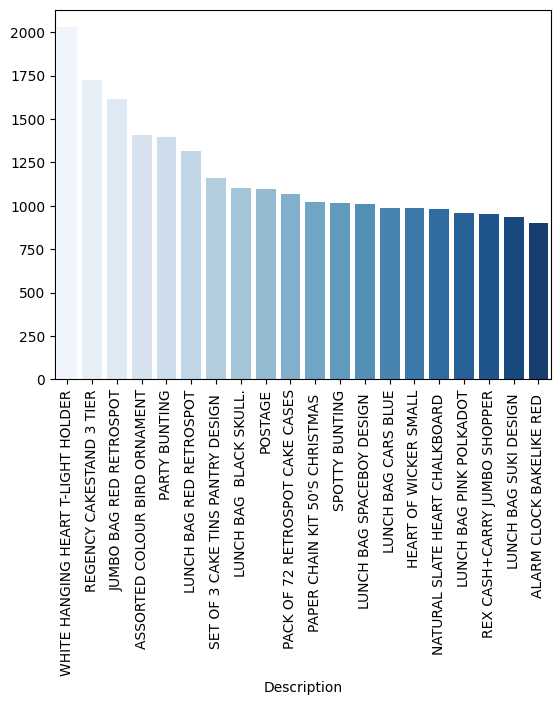

In [64]:
import seaborn as sns
sns.barplot(x=description_counts.iloc[0:20].index,y=description_counts.iloc[0:20].values,palette="Blues")

from matplotlib import pyplot as plt
plt.xticks(rotation=90)

Before this graph, we had calculated the distrubutions. Now, they are all organzied on this graph.

In [65]:
quantity_counts = main_df.Quantity.value_counts().sort_values(ascending=False)
print(quantity_counts)

Quantity
1        73314
12       60033
2        58003
6        37688
4        32183
         ...  
630          1
992          1
672          1
67           1
80995        1
Name: count, Length: 302, dtype: int64


<ipython-input-91-d08e2b0542db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quantity_counts.iloc[0:20].index,y=quantity_counts.iloc[0:20].values,palette="Blues")


Text(0, 0.5, 'Number of Items')

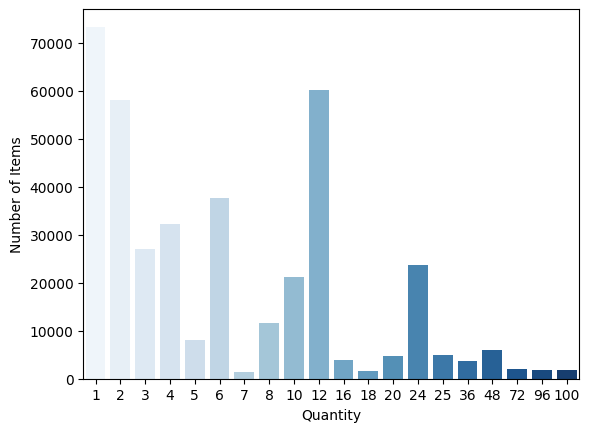

In [91]:
import seaborn as sns
sns.barplot(x=quantity_counts.iloc[0:20].index,y=quantity_counts.iloc[0:20].values,palette="Blues")
plt.ylabel("Number of Items")

In [67]:
stockcode_counts = main_df.StockCode.value_counts().sort_values(ascending=False)
print(stockcode_counts)

StockCode
85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
          ... 
20678        1
47503J       1
90026A       1
90176C       1
23843        1
Name: count, Length: 3665, dtype: int64


<ipython-input-68-333c56548b39>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stockcode_counts.iloc[0:20].index,y=stockcode_counts.iloc[0:20].values,palette="Blues")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '85123A'),
  Text(1, 0, '22423'),
  Text(2, 0, '85099B'),
  Text(3, 0, '84879'),
  Text(4, 0, '47566'),
  Text(5, 0, '20725'),
  Text(6, 0, '22720'),
  Text(7, 0, '20727'),
  Text(8, 0, 'POST'),
  Text(9, 0, '23203'),
  Text(10, 0, '22383'),
  Text(11, 0, '21212'),
  Text(12, 0, '22197'),
  Text(13, 0, '23209'),
  Text(14, 0, '23298'),
  Text(15, 0, '22086'),
  Text(16, 0, '22382'),
  Text(17, 0, '20728'),
  Text(18, 0, '22469'),
  Text(19, 0, '22457')])

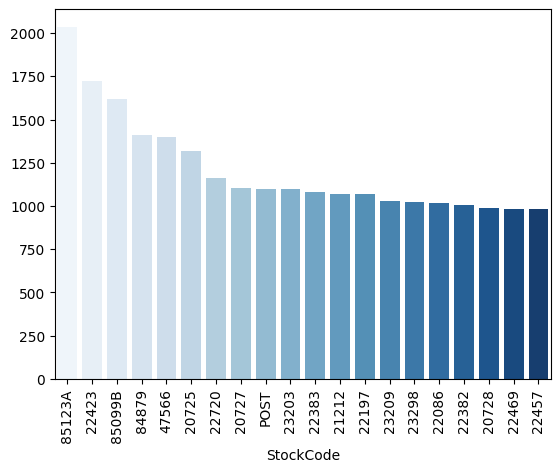

In [68]:
import seaborn as sns
sns.barplot(x=stockcode_counts.iloc[0:20].index,y=stockcode_counts.iloc[0:20].values,palette="Blues")
plt.xticks(rotation=90)

In [69]:
country_counts = main_df.Country.value_counts().sort_values(ascending=False)
print(country_counts)

Country
United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


<ipython-input-70-cb596f46338b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.iloc[0:20].index,y=country_counts.iloc[0:20].values,palette="Blues")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'France'),
  Text(3, 0, 'EIRE'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'Netherlands'),
  Text(6, 0, 'Belgium'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Portugal'),
  Text(9, 0, 'Australia'),
  Text(10, 0, 'Norway'),
  Text(11, 0, 'Italy'),
  Text(12, 0, 'Channel Islands'),
  Text(13, 0, 'Finland'),
  Text(14, 0, 'Cyprus'),
  Text(15, 0, 'Sweden'),
  Text(16, 0, 'Austria'),
  Text(17, 0, 'Denmark'),
  Text(18, 0, 'Poland'),
  Text(19, 0, 'Japan')])

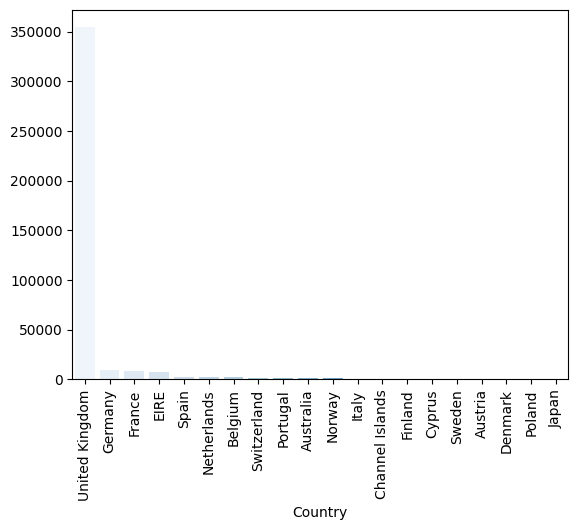

In [70]:
import seaborn as sns
sns.barplot(x=country_counts.iloc[0:20].index,y=country_counts.iloc[0:20].values,palette="Blues")
plt.xticks(rotation=90)

HMW: Add and comment data exploration

In [71]:
unitprice_counts = main_df.UnitPrice.value_counts().sort_values(ascending=False)
print(unitprice_counts)

UnitPrice
1.25      45841
1.65      36834
2.95      26562
0.85      25968
0.42      21812
          ...  
3.16          1
1.01          1
2.42          1
7.84          1
183.75        1
Name: count, Length: 441, dtype: int64


<ipython-input-72-92f778b8d936>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unitprice_counts.iloc[0:20].index,y=unitprice_counts.iloc[0:20].values,palette="Blues")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '0.39'),
  Text(1, 0, '0.42'),
  Text(2, 0, '0.55'),
  Text(3, 0, '0.65'),
  Text(4, 0, '0.83'),
  Text(5, 0, '0.85'),
  Text(6, 0, '1.25'),
  Text(7, 0, '1.45'),
  Text(8, 0, '1.65'),
  Text(9, 0, '1.95'),
  Text(10, 0, '2.08'),
  Text(11, 0, '2.1'),
  Text(12, 0, '2.55'),
  Text(13, 0, '2.95'),
  Text(14, 0, '3.75'),
  Text(15, 0, '4.15'),
  Text(16, 0, '4.25'),
  Text(17, 0, '4.95'),
  Text(18, 0, '5.95'),
  Text(19, 0, '7.95')])

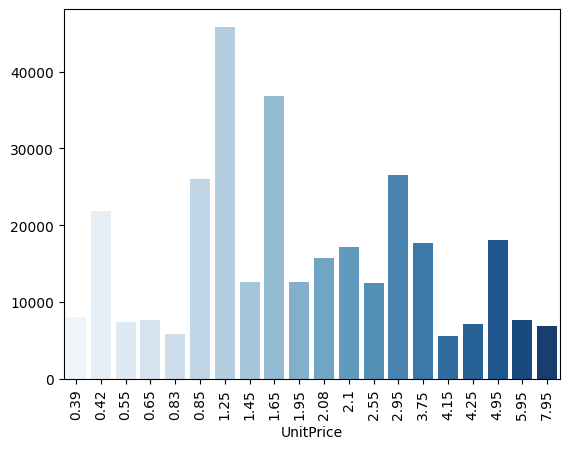

In [72]:
import seaborn as sns
sns.barplot(x=unitprice_counts.iloc[0:20].index,y=unitprice_counts.iloc[0:20].values,palette="Blues")
plt.xticks(rotation=90)

In [73]:
main_df = main_df.sample(frac=0.1)
main_df.head()
len(main_df["Description"].unique())
main_df_copy = main_df.copy()

Here, we are using a fraction of the dataset. We did this because the larger models will take longer to run, but just to test the data set, we just need a small portion.

In [74]:
main_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
424388,573264,20728,LUNCH BAG CARS BLUE,4,10/28/2011 12:36,1.65,14415,United Kingdom,False
289006,562218,20971,PINK BLUE FELT CRAFT TRINKET BOX,24,8/3/2011 14:07,1.25,13851,United Kingdom,False
132431,547664,82486,WOOD S/3 CABINET ANT WHITE FINISH,1,3/24/2011 13:16,8.95,13069,United Kingdom,False
90473,544040,22666,RECIPE BOX PANTRY YELLOW DESIGN,1,2/15/2011 11:40,2.95,14701,United Kingdom,False
406174,571740,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,10/19/2011 10:34,7.95,17973,United Kingdom,False


In [75]:
main_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39792 entries, 424388 to 37843
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    39792 non-null  object 
 1   StockCode    39792 non-null  object 
 2   Description  39792 non-null  object 
 3   Quantity     39792 non-null  int64  
 4   InvoiceDate  39792 non-null  object 
 5   UnitPrice    39792 non-null  float64
 6   CustomerID   39792 non-null  object 
 7   Country      39792 non-null  object 
 8   IsCancelled  39792 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 3.8+ MB


In [76]:
# from sklearn.linear_model import LinearRegression
# main_df_copy.dropna(inplace=True)
# main_df["DescriptionLength"] = main_df.Description.apply(lambda l: len(l))
# main_df["DescriptionLengthMedian"] = main_df.groupby("StockCode").DescriptionLength.median()
# main_df.dropna(inplace=True)
# Y= main_df[["Quantity"]]
# X= main_df[['UnitPrice', 'DescriptionLengthMedian' , 'CustomerID']]
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

main_df_copy.dropna(inplace=True)
main_df_copy["Description"] = main_df_copy["Description"].astype(str).fillna('')
main_df_copy["DescriptionLength"] = main_df_copy["Description"].apply(lambda l: len(l))

# Compute the median DescriptionLength for each StockCode group
main_df_copy["DescriptionLengthMedian"] = main_df_copy.groupby("StockCode")["DescriptionLength"].transform('median')

main_df_copy["MedianQuant"] = main_df_copy.groupby("StockCode")["Quantity"].transform("median")

main_df_copy["CustomerInfo"] = main_df_copy.groupby("StockCode")["CustomerID"].transform("nunique")

main_df_copy['Month'] = pd.to_datetime(main_df_copy['InvoiceDate'])

main_df_copy['Month'] = main_df_copy['Month'].dt.month

main_df_copy['Weekday'] = pd.to_datetime(main_df_copy['InvoiceDate'])

main_df_copy['Weekday'] = main_df_copy['Weekday'].dt.weekday

# Drop any remaining NaN values (though there shouldn't be any after the above operations)
main_df_copy.dropna(inplace=True)

# Define Y and X
Y = main_df_copy[["Quantity"]]
X = main_df_copy[['UnitPrice', 'DescriptionLengthMedian', 'CustomerInfo', 'MedianQuant', 'Month', 'Weekday']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)


Here, we are just defining new variables, calculated based on the description adn the date to include seasonality effects and taking advantage of the diversity and descriptions of the items. We defined the dependent and independent variables in which the dependent variable was the quatity, which is what we want to predict. After defining X and y, we divided between training and testing.

We had added the Price Data, but since it brought down the accuracy, it was best to remove it. The reason the accuracy dropped was because the variety of  prices adds predicting power to the model, as quantity appears to be super senstive to price.  Customer Information represents the amount of times the customer has purchased a specific product.

In [77]:
main_df_copy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,DescriptionLength,DescriptionLengthMedian,MedianQuant,CustomerInfo,Month,Weekday
424388,573264,20728,LUNCH BAG CARS BLUE,4,10/28/2011 12:36,1.65,14415,United Kingdom,False,19,19.0,10.0,91,10,4
289006,562218,20971,PINK BLUE FELT CRAFT TRINKET BOX,24,8/3/2011 14:07,1.25,13851,United Kingdom,False,32,32.0,12.0,35,8,2
132431,547664,82486,WOOD S/3 CABINET ANT WHITE FINISH,1,3/24/2011 13:16,8.95,13069,United Kingdom,False,33,33.0,2.0,48,3,3
90473,544040,22666,RECIPE BOX PANTRY YELLOW DESIGN,1,2/15/2011 11:40,2.95,14701,United Kingdom,False,31,31.0,6.0,67,2,1
406174,571740,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,10/19/2011 10:34,7.95,17973,United Kingdom,False,35,35.0,2.0,17,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250103,559000,21755,LOVE BUILDING BLOCK WORD,2,7/5/2011 12:15,5.95,14099,United Kingdom,False,24,24.0,2.0,48,7,1
401707,571441,72817,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,18,10/17/2011 13:31,1.63,14096,United Kingdom,False,35,35.0,5.0,11,10,0
438861,574336,22692,DOORMAT WELCOME TO OUR HOME,2,11/4/2011 9:52,8.25,12397,Belgium,False,27,27.0,2.0,27,11,4
143083,548664,22305,COFFEE MUG PINK PAISLEY DESIGN,12,4/1/2011 14:45,2.55,14911,EIRE,False,30,30.0,12.0,4,4,4


In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
print(LinearRegression)

<class 'sklearn.linear_model._base.LinearRegression'>


# From here on, we are testing the models!

Initializing linear regression

In [80]:
clf = LinearRegression().fit(X_train, y_train)

In [81]:
predictions = clf.predict(X_test)
print(clf.coef_)
print(X_train)

[[-0.02888372 -0.08165518  0.03553001  1.12356344 -0.08293082 -0.55575892]]
        UnitPrice  DescriptionLengthMedian  CustomerInfo  MedianQuant  Month  \
376260       1.69                     29.0            28          5.5     10   
153503       2.08                     16.0            70         10.0      4   
510143       3.75                     32.0             8          4.0     11   
241297       0.29                     31.0            10         18.0      6   
274536       2.55                     21.0            22          4.0      7   
...           ...                      ...           ...          ...    ...   
116499       1.95                     23.0            22          6.0      3   
127686       1.69                     29.0            28          5.5      3   
356371       3.75                     24.0            26          6.0      9   
296363       0.75                     27.0             9         12.0      8   
110625       2.10                     29.0  

I expect this to predict to assign us core on how the model is predicting. Whether they are good esimates, versus bad ones.

In [82]:
clf.score(X_test, y_test)

0.06121062689172363

In [83]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=15, random_state=0)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)
preds_random_forest = regr.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)




preds_random_forest = regr.predict(X_test)
Now, we will use the feature: 'Importances.' This will help us find what is truly valuable from our set of variables to predict sales using Random Forest.

In [84]:
importances = regr.feature_importances_
print(importances)

[0.44036346 0.0935153  0.20455671 0.13897116 0.05847101 0.06412235]


After declaring the feature, we have to convert it to 'pd.Series'. We need to take this step because pandas is suitable for a plot bar, and without it, we wouldn't be able to graph the data.

Text(0, 0.5, 'Predictions')

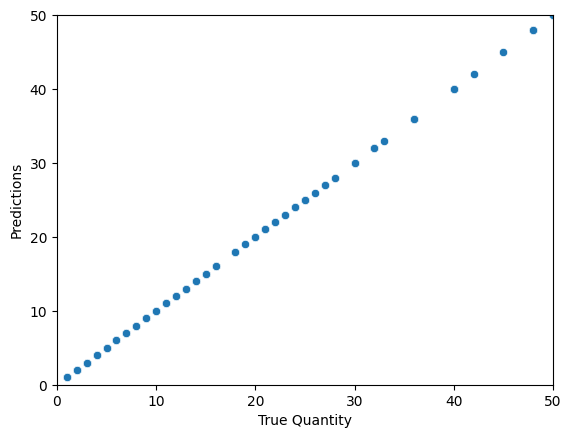

In [90]:
import seaborn as sns
sns.scatterplot(x=np.array(y_test).reshape(-1), y=np.array(y_test).reshape(-1))
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel("True Quantity")
plt.ylabel("Predictions")

<Axes: >

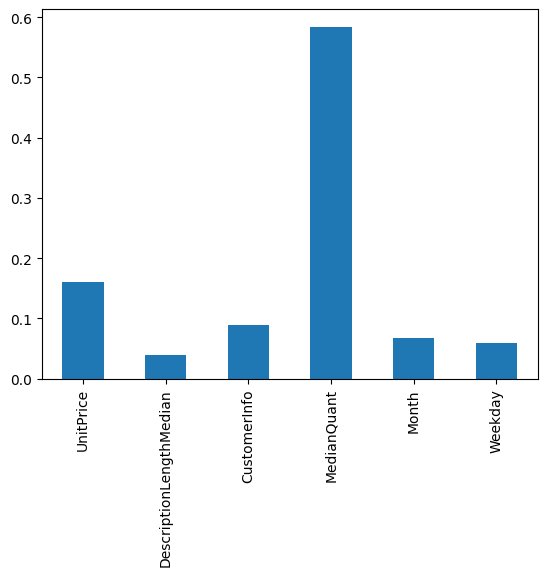

In [34]:
importances = pd.Series(importances, index=X.columns)
fig, ax = plt.subplots()
importances.plot.bar()

The "y" column represents the Gini Index. The Gini Index is also known as Gini impurity. It is a measure of how mixed or impure a dataset is. This index meausures from 0 to 1. So, as shown in the graph above, Unit Price has the most affect to our accuracy. The higher the impurity, the better, because if everything was constant, there would be no variation to track.

In [35]:
from sklearn.neural_network import MLPRegressor
neural_net = MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes=(45,25,300)).fit(X_train, y_train)
prediction = neural_net.predict(X_test)
print(neural_net.score(X_test, y_test))
print(prediction[0:60])

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1032812312834227
[ 5.36850726 38.09107659 13.661657   41.10857197 18.87650946  8.13438413
 18.5224203  18.06213288 13.41743991  9.23685578 12.72313204  9.62840255
 20.27309362 36.08284712 12.17048392 17.78055882  4.20261032 18.53385339
 54.97708133  3.45851849  5.08711248  6.66144275  4.3233201   8.20224851
  3.87607635 12.77189696 13.5052071  10.51108023  2.07465856  2.63768639
 18.26073057 16.77411726 12.90443087 26.68979026 38.8033222  17.11029337
 14.41478523 18.85697821  3.04062481  9.64240354 18.75395914  4.37189238
  8.50454176  6.47979183  5.27713483 17.96668265 20.24313788  2.99436331
  5.86598732 19.82116557  9.77115638  9.01016208  9.85493514  8.6989042
 17.0536184   8.64234588 23.19409334 16.53321963  9.57533521  8.23530649]


We are adding a linear regression to the dataset.

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

min_max_scaler = preprocessing.MinMaxScaler()
y_train_minmax = min_max_scaler.fit_transform(y_train)
y_test_minmax = min_max_scaler.transform(y_test)
gbm = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=1 )
gbm.fit(X_train_minmax, y_train_minmax)
print("RMSE", mean_squared_error(y_test_minmax, gbm.predict(X_test_minmax))/np.average(y_test_minmax))

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


RMSE 0.0014614506258291285


In [37]:
print(np.min(y_test_minmax))
print(np.max(y_test_minmax))

0.0
0.01776674815418426


In [38]:
preds = gbm.predict(X_test_minmax)
print(preds)

[7.12707294e-05 6.66263678e-04 9.62733854e-05 ... 7.12707294e-05
 1.03169338e-04 1.48398666e-04]


In [39]:
print(np.min(preds))
print(np.max(preds))
from sklearn.metrics import r2_score
r2 = r2_score(y_test, preds)
print("R-squared:", r2)

1.91454489313182e-05
0.00289752064078168
R-squared: -0.10667806497469501


In [40]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
params = {
            'max_depth': 1,
            'learning_rate': 0.1,
            'n_estimators':100  }
xgb_clf = XGBRegressor(**params)
xgb_clf.fit(X_train_minmax, y_train)
print("RMSE", mean_squared_error(y_test, gbm.predict(X_test_minmax))/np.average(y_test))
preds = xgb_clf.predict(X_test_minmax)
print(preds)
r2 = r2_score(y_test, preds)
print("R-squared:", r2)

RMSE 135.7434520071108
[10.476045 36.462406 12.664413 ... 10.476045 10.476045 12.664413]
R-squared: 0.06370848417282104


In [41]:
print(main_df_filtered)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice CustomerID         Country  IsCancelled 

In [42]:
print(main_df['Quantity'].quantile([0.01, 0.25, 0.5, 0.75, 0.99]))
filtered_df = main_df[(main_df['Quantity'] > 0) & (main_df['Quantity'] < 50)]

0.01      1.0
0.25      2.0
0.50      6.0
0.75     12.0
0.99    144.0
Name: Quantity, dtype: float64


In [43]:
import numpy as np
import pandas as pd
arr1 = np.array([4, 4, 2, 3])
new_arr1 = [x for x in arr1]
new_arr2 = [x for x in arr1]
dff = pd.DataFrame({'arr1':new_arr1, 'arr2':new_arr2})
dff.head()
print(arr1)
print(new_arr1)

[4 4 2 3]
[4, 4, 2, 3]


In [44]:
preds_gbm = np.array(preds_random_forest)
labels_gbm = np.array(y_test)
labels_gbm = np.squeeze(labels_gbm, axis=1)
preds_gbm = [x for x in preds_gbm]
labels_gbm = [x for x in labels_gbm]
dataset_answers = pd.DataFrame({'Label': labels_gbm, 'Predictions':preds_gbm})
print(preds_gbm)
print(labels_gbm)

[2.2441048852830856, 65.32349528009978, 6.846457565199254, 37.89998838469207, 16.629688445626048, 6.491826325690685, 11.485894190784125, 9.234379201086595, 7.312841096799355, 5.111882156722071, 11.702793442049044, 8.221780099848313, 14.06720952087564, 20.99332230041797, 7.292769997245373, 9.822358574373714, 4.284350735910942, 12.38567549365941, 49.0518956185933, 1.9942088404269827, 4.2591533923716405, 3.695155111428469, 5.350398901217021, 6.926098501175732, 2.4313842492544477, 12.303520115869668, 5.727196989328685, 7.937844143957801, 1.146960417497837, 2.4009334433593983, 12.00978368791011, 11.704959011345899, 20.127751393266212, 19.510039442901842, 50.744753548264455, 11.368197266766797, 14.627880292927925, 13.45510255423905, 2.3130465807465366, 11.779033555778447, 8.193083476011346, 3.5787241259544675, 4.881907699172174, 9.58816987078342, 4.551386856603172, 9.190314327491086, 13.428606294294848, 6.227572409586719, 5.34896155532558, 9.241828859237268, 5.442937498605618, 5.543748897222

In [45]:
dataset_answers.head(15)

dataset_answers = dataset_answers.sort_values(by='Label')

dataset_answers.head(15)

,Label,Predictions
0,1,2.244105
5627,1,5.018236
5628,1,7.880940
5635,1,7.696204
5641,1,9.070717
5666,1,5.756290
5672,1,5.039913
5674,1,3.199366
5675,1,5.129857
5676,1,1.592958


Text(0.5, 0, 'True Quantity')

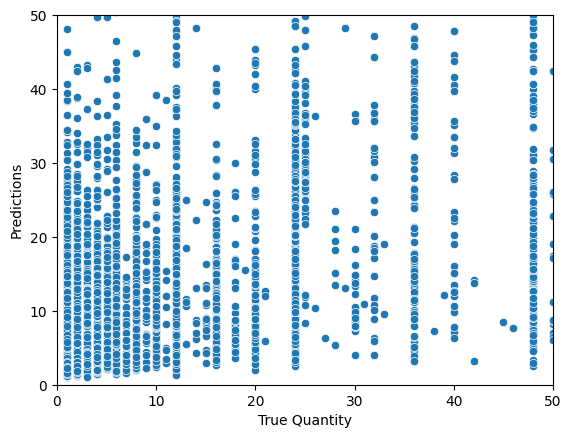

In [50]:
import seaborn as sns
sns.scatterplot(x='True Quantity', y='Predictions', data = dataset_answers)
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel("True Quantity")

Since the graph goes to 1750, rather than 50, we need to remove that part of the graph to be able to correctly compare the graphs.

# Now to start buidling the app!

In [47]:
# Function to select rows based on StockCode
def select_code(stockcode):
    dataset_stockcode = main_df[main_df["StockCode"] == stockcode]
    return dataset_stockcode

# Example
dataset_user = select_code("267376")

# Function to select rows based on InvoiceDate
def select_date(invoicedate, df):
    dataset_invoicedate = df[df["InvoiceDate"] == invoicedate]
    return dataset_invoicedate

# Example
dataset_user_date = select_date("1/20/2011 11:15", dataset_user)

# Function to extract Quantity as a separate array
def select_quantity(df):
    dataset_quantity = df["Quantity"].values
    return dataset_quantity

# Extract quantities from the filtered dataset
quantities = select_quantity(dataset_user_date)

# Final prediction function with all 6 features
def makepreds(UnitPrice, DescriptionLengthMedian, CustomerInfo, MedianQuant, Month, Weekday):
    # Combine features into a single array for prediction
    features = [[UnitPrice, DescriptionLengthMedian, CustomerInfo, MedianQuant, Month, Weekday]]
    preds = xgb_clf.predict(features)  # Ensure xgb_clf is already trained
    return preds

# Example usage for prediction (replace with actual values)
UnitPrice = 15.0
DescriptionLengthMedian = 10
CustomerInfo = 12345
MedianQuant = 3
Month = 1  # January
Weekday = 4  # Thursday

# Make predictions using the function
predictions = makepreds(UnitPrice, DescriptionLengthMedian, CustomerInfo, MedianQuant, Month, Weekday)

# Output predictions
print("Predictions:", predictions)

# Example: Checking the transformed test dataset
print("MinMax Scaled X_test:", X_test_minmax)


Predictions: [80037.984]
MinMax Scaled X_test: [[1.91057086e-03 7.93103448e-01 3.68421053e-01 1.23465936e-05
  3.63636364e-01 1.66666667e-01]
 [2.88388055e-05 8.62068966e-01 1.05263158e-01 2.83971652e-04
  9.09090909e-01 6.66666667e-01]
 [4.68630589e-04 6.89655172e-01 5.26315789e-02 1.23465936e-04
  2.72727273e-01 1.00000000e+00]
 ...
 [1.18960073e-03 7.93103448e-01 5.92105263e-01 2.46931871e-05
  9.09090909e-02 1.66666667e-01]
 [9.97342023e-04 8.96551724e-01 3.55263158e-01 6.17329679e-05
  5.45454545e-01 5.00000000e-01]
 [4.68630589e-04 4.82758621e-01 3.35526316e-01 1.35812529e-04
  2.72727273e-01 1.66666667e-01]]


In [48]:
def select_code(stockcode):
  dataset_stockcode = main_df[main_df["StockCode"]==stockcode]
  return dataset_stockcode
dataset_user = select_code("267376")

def select_date(invoicedate,df):
  dataset_invoicedate = df[df["InvoiceDate"]==invoicedate]
  return dataset_invoicedate
dataset_user = select_code("1/20/2011 11:15")

def select_quantity(df):
  dataset_quantity = df[["Quantity"]].values
  return dataset_quantity
# Work here - Find the 6 things we need to predict. Place the data into an array that includes all 6 features.
def makepreds(UnitPrice, DescriptionLengthMedian, CustomerInfo, MedianQuant, Month, Weekday):
  preds = xgb_clf.predict()
  return preds
print(X_test_minmax)

[[1.91057086e-03 7.93103448e-01 3.68421053e-01 1.23465936e-05
  3.63636364e-01 1.66666667e-01]
 [2.88388055e-05 8.62068966e-01 1.05263158e-01 2.83971652e-04
  9.09090909e-01 6.66666667e-01]
 [4.68630589e-04 6.89655172e-01 5.26315789e-02 1.23465936e-04
  2.72727273e-01 1.00000000e+00]
 ...
 [1.18960073e-03 7.93103448e-01 5.92105263e-01 2.46931871e-05
  9.09090909e-02 1.66666667e-01]
 [9.97342023e-04 8.96551724e-01 3.55263158e-01 6.17329679e-05
  5.45454545e-01 5.00000000e-01]
 [4.68630589e-04 4.82758621e-01 3.35526316e-01 1.35812529e-04
  2.72727273e-01 1.66666667e-01]]


From this point on, we will start working on the "front-end" part of the code. The code previously was "back-end".

In [49]:
from joblib import dump, load
!pip -q install streamlit
!ngrok 2qdgL5nxDZCSYzFfM9dX1tXPutn_4fThXE1cHDxR3veRyLSoi
import streamlit as st
!pip -q install pyngrok
# from pyngrok import ngrok
from choco install ngrok

SyntaxError: invalid syntax (<ipython-input-49-fea0b59369d3>, line 7)

In [ ]:
def create_header():
  st.title("Sales Prediction")
  st.header("By Urvi Garg")
  st.subheader("Given the characteristics if the item, let's predict the amount of sales")

def launch_website():
  print ("Click this link to try your web app:")
  public_url = ngrok.connect()
  print (public_url)
  !streamlit run --server.port 80 app.py >/dev/null

In [ ]:
%%writefile header.py
import streamlit as st
def create_header():
  st.title("Sales Prediction")
  st.header("By Urvi Garg")
  st.subheader("Given the characteristics if the item, let's predict the amount of sales")

In [ ]:
%%writefile user.py
def user_input():
  stockcode = st.number_input("What is the stock code you want to search")

  invoicedate = st.number_input("What date do you want the data to focus on?")
  return stockcode,invoicedate

def filtering(stockcode,invoicedate):
  stockcodedataset = select_code(stockcode)
  invoicedatedataset = select_date(invoicedate,stockcodedataset)
  quantitydataset = select_quantity(invoicedatedataset)
  st.dataframe(quantitydataset)
  print(quantitydataset)


In [ ]:
%%writefile app.py
from header import *
from user import *
create_header()
stockcode,invoicedate = user_input()
filtering(stockcode,invoicedate)

In [ ]:
launch_website()